# Assignment 2. Sentiment analysis using logistic regression and feed-forward  neural networks

Full instructions on completion of this assignment can be found in Canvas.

## 1. Theoretical part

### 1.1 Logistic regression

Let us introduce the following notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size N, 

$x_{\{i\}} \in\mathbb{R}^M$ --- feature vector of the $i^{th}$ sample from train set, $M$ --- number of features, 

$y_{\{i\}} \in \{0, 1\}$ --- label (class) of the $i^{th}$ sample, 

$w\in\mathbb{R}^{M+1}$ --- weight vector in LogReg.

_**NB:**_ linear transofrmations on $x_{\{i\}}$ is as follows: 
$$
w_0 + w^Tx_{\{i\}} = w_0+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M},
$$

where $w_0$ stands for intercept term (bias).

For the convenience of implementation we will set $x_{\{i\},0} = 1$. In other words, we will add 1 to vectors $x_{\{i\}}$. Therefore, linear transformations will be the following:

$$w_0*1+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M} \equiv w^T[1;x_{\{i\}}]$$


1. Find the derivative of the sigmoid function $\sigma(z)$ and express it in terms of sigmoid, considering $z$ to be scalar 
$$ 
\sigma(z) = {\frac {1}{1+e^{-z}}}
$$

$$ 
(\sigma(z))^{'} = \left({\frac {1}{1+e^{-z}}}\right)^{'} = \frac{e^{-z}}{(1+e^{-z})^2} =  \frac{1}{{1+e^{-z}}}\frac{e^{-z}}{1+e^{-z}} = \frac{1}{{1+e^{-z}}}\frac{1+e^{-z}-1}{1+e^{-z}} = \frac{1}{{1+e^{-z}}}\left(1-\frac{1}{1+e^{-z}}\right) = \sigma(z)(1-\sigma(z))
$$

2. Prove that:  

$ \sigma(-z) = 1 - \sigma(z)$

$$ \sigma(-z) = \frac{1}{1+e^{z}}~~~~~~~~~~~~~~~~~~1 - \sigma(z) =\frac{1+e^{-z}-1}{1+e^{-z}} = \frac{e^{-z}}{1+e^{-z}} =  \frac{e^{-z}*e^{z}}{(1+e^{-z})*e^{z}} =  \frac{1*e^{-z}}{(1+e^{z})*e^{-z}} = \frac{1}{1+e^{z}} =  \sigma(-z)$$

3. Write out the formula of hypothesis $h_w(x)$ for logistic regression.

$$
\hat{y} = h_w(x) = \sigma([1;x]^Tw) = \frac{1}{1+e^{-w_0 - w^Tx}}
$$

4. Plot the values of Binary Cross-Entropy error function for one sample from positve class and one sample from negative, depending on the logreg output $\hat y=h_w(x)$. What the loss function value will be equal to, given zero weights (right after the initialization)?
$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329


In [31]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

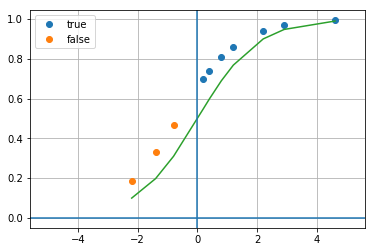

In [37]:
plt.plot(x[np.where(y_pred>0.5)],y_pred[y_pred>0.5],'o',label='true')
plt.plot(x[np.where(y_pred<0.5)],y_pred[y_pred<0.5],'o',label='false')
plt.plot(x,sigma(x),'-')
plt.axhline(0)
plt.axvline(0)
plt.xlim(-x[-1]-1,x[-1]+1)
plt.grid()
plt.legend()

What the loss function value will be equal to, given zero weights (right after the initialization)?
$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y) = -y \log \sigma(z) + (1-y) \log (1-\sigma(z)) = -\log \sigma(z)= \left<\sigma(0) = \frac{1}{2}\right> = \log 2
$$

5. Calculate gradient for cost function $\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}})$ for binary (2 class) logistic regression. As evaluation function use cross-entropy with l2 regularization:
$$ L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N(y_{\{i\}} \log h_w(x_{\{i\}}) + (1 - y_{\{i\}}) \log (1 - h_w(x_{\{i\}}))) + \alpha\sum_{j=1}^M(w_j)^2$$

$h_w(x_{\{i\}}) = \frac{1}{1+e^{-w^Tx_i}}$
$$L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N\left<y_{\{i\}} \log \frac{1}{1+e^{-w^Tx_i}} + (1 - y_{\{i\}}) \log \left(1 - \frac{1}{1+e^{-w^Tx_i}}\right)\right> + \alpha\sum_{j=1}^M(w_j)^2 
\\ = - \frac1{N} \sum_{i=1}^N\left<-y_{\{i\}} \log (1+e^{-w^Tx_i}) + (1 - y_{\{i\}}) \log e^{-w^Tx_i} - (1 - y_{\{i\}}) \log (1+e^{-w^Tx_i}))\right> + \alpha\sum_{j=1}^M(w_j)^2 
\\ = - \frac1{N} \sum_{i=1}^N\left<(1 - y_{\{i\}}) \log e^{-w^Tx_i} - \log (1+e^{-w^Tx_i}))\right> + \alpha\sum_{j=1}^M(w_j)^2  = - \frac1{N} \sum_{i=1}^N\left<(1 - y_{\{i\}}) (-w^Tx_i)- \log (1+e^{-w^Tx_i}))\right> + \alpha\sum_{j=1}^M(w_j)^2 $$

$$
\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N\left<(1 - y_{\{i\}}) (-x_i)+ \frac{x_i}{ (1+e^{w^Tx_i})}\right> + 2\alpha\sum_{j=1}^M(w_j) 
\\ = - \frac1{N} \sum_{i=1}^N\left<x_i y_{\{i\}} + x_i\left(\frac{1}{ (1+e^{w^Tx_i})}-1\right)\right> + 2\alpha\sum_{j=1}^M(w_j) =~~ as~~<h_w(-z) = 1 - h_w(z)> 
\\ = - \frac1{N} \sum_{i=1}^N\left<x_i y_{\{i\}} - x_i h_w(x_{\{i\}})\right> + 2\alpha\sum_{j=1}^M(w_j) = \frac1{N} \sum_{i=1}^N\left<x_i[ h_w(x_{\{i\}}) - y_{\{i\}}]\right> + 2\alpha\sum_{j=1}^M(w_j) 
$$

6. Write out the formula for the update of vector $w$ with parameters using stochastic gradient descent optimization

$$ w^{(t+1)} = w^{(t)} - \eta \frac{\partial L}{\partial w} $$
$$ w^{(t+1)} = w^{(t)} - \eta \frac1{N} \sum_{i=1}^N\left<x_i( h_w(x_{\{i\}}) - y_{\{i\}})\right> $$



7. Prove that binary cross-entropy evaluation function for binary logistic regression has the only one minimum

$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

need to prove that second derivative of both terms  > 0

first and second derivative for first term: 

$$-\left(\log \frac{1}{1+e^{-z})} \right)^{'}=\frac{-e^{-z}}{(1+e^{-z})} = (-\sigma(-z))$$  
$$-\left(\log \frac{1}{1+e^{-z})} \right)^{''} =\frac{e^{-z}}{(1+e^{-z})^2} > 0 $$

first and second derivative for second term:  from $1-sigma(z)=\sigma(-z)$ ---> 
$$\left(\log (1 - \hat y)\right)^{'} = -\frac{e^z}{1+e^z}$$

$$\left(\log (1 - \hat y)\right)^{''}= \frac{e^{-z}}{(1+e^-z)^2} >0$$

--> function has only 1 minimum

### 1.2 Feed-forward Neural Network

Let use the fllowing notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size $N$

$x_{\{i\}} \in\mathbb{R}^M$, where $i$ is the review index, 

$M=s^{(0)}$ --- number of features or dictionary size, 

$y_{\{i\}} \in \{0, 1\}$, $s^{(l)}$ - number of neurons in the layer $l$, 

$W^{(l)}$ --- parameter matrix of $l^{th}$ layer of size $s^{l} \times (s^{l-1}+1)$ (as we add bias), where

$l=\{1,2,\cdots,L\}$, $L$ --- number of layers (number of hidden layers is equal to $L-1$)


Feed-forward Neural Network example with two layers (one hidden layer):

![img](img/neuralnet.PNG)


Feed-forward propagation:

$a^{(0)} = x_{\{i\}} $

$z^{(1)} = W^{(1)} [1, a^{(0)}] $

$a^{(1)} = tanh(z^{(1)})$

$z^{(2)} = W^{(2)}[1, a^{(1)}] $

$a^{(2)} = softmax(z^{(2)}) $


Backpropagation:
...

1. Calculate the derivative for $\tanh(z)$ function and express it in terms of $tanh(z)$, considering $z$ to be a scalar. Transform your answer, so that the exponent will be used only once while computing $\tanh(z)$ and its derivative.
$$ \tanh(z) = {\frac {e^{z}-e^{-z}}{e^{z}+e^{-z}}}$$


$$ (\tanh(z))^{'} = {\frac {(e^{-z}+e^{-z})^2+(e^{z}-e^{-z})^2}{(e^{z}+e^{-z})^2}} = 1 - \tanh^2(z)$$

2. Write out the cross entropy loss function $L(W^{(1)}, \ldots, W^{(L)},x_{\{1\}},\ldots,x_{\{N\}})$ for neural network with one hidden layer ($L=2$), and then generalize it for neural network with $L-1$ hidden layers and for multiclass classification (with $K$ classes). Use $\tanh(z)$ activation function for hidden layer,  $softmax(z)$ for output layer.

$$
L_{CE} = - \sum_{i = 1}^K y_i \log \hat y  = - \sum_{i = 1}^K y_i \log \left(\frac{e^{z_i^L}}{\sum_{p= 1}^K e^{z_p^L}}\right) =  - \sum_{i = 1}^K y_i (z_i^L - \log \sum_{p= 1}^K e^{z_p^L} )
$$

3. Demonstrate that $softmax(z+c)=softmax(z)$, where ${c}$ -- vector with equal components

 $$
 softmax(z+c)= \frac{e^{z+c}}{\sum_{j= 1}^K e^{z_j+c}} = \frac{e^c e^{z} }{e^c \sum_{j= 1}^K e^{z_j}} = \frac{ e^{z} }{ \sum_{j= 1}^K e^{z_j}} = softmax(z)
 $$

4. How many parameters does the neural network have? Inputs vectors size is $M$, output vectors size is $K$ and the number of neurons is $H$.

Hidden layer  =  $M * H$

Output layer  =  $K * H$

Num. of parameters = $(M+K)*H$

5. Provide the formula for the $\delta^{(L)}$ --- gradient of loss function based on pre-activation on the last layer. $z^{(L)}$.

 $$
 \delta^{(L)}_j = \frac{\partial L_{CE}}{\partial z^{(L)}_j} = - \sum_{i = 1}^K y_i \left(1_{i = j} - \frac{e^{z_j^L}}{\sum_{p= 1}^K e^{z_p^L}}\right)  = \left< a_j^L = \frac{e^{z_j^L}}{\sum_{p= 1}^K e^{z_p^L}} \right> =  - \sum_{i = 1}^K y_i (1_{i = j} - a_j^L) =  a_j^L \sum_{i = 1}^K y_i - \sum_{i = 1}^K y_i * 1_{i = j} = 
 a_j^L - y_j $$

6. Provide the formula for $\delta^{(l)}$ --- gradient of loss function on $z^{(l)}$ through $\delta^{(l+1)}$.

$$
\delta^{(l)} = \frac{\partial L_{CE}}{\partial a^l} \frac{\partial a^l}{\partial z^{(l)}} = \delta^{(l+1)} W^{(l+1)} * g^{'}(z^{(l-1)})
\\ \frac{\partial L_{CE}}{\partial a^l} =  \frac{\partial L_{CE}}{\partial z^l} \frac{\partial z^{(l)}}{\partial a^l} = \delta^{(l+1)} * W^{(l+1)} 
\\ \frac{\partial a^l}{\partial z^{(l)}} = g^{'}(z^{(l-1)})
$$

7. Provide the formula for $\nabla_{W^{(l)}} L$ --- gradient of loss function on weights $W^{(l)}$, using $\delta^{(l)}$.

$$ 
\nabla_{W^{(l)}} L = \frac{\partial L_{CE}}{\partial W^{(l)}} = \frac{\partial L_{CE}}{\partial a^l} \frac{\partial a^l}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial W^{(l)}} = \delta^{(l)}  \frac{\partial z^{(l)}}{\partial W^{(l)}} = \delta^{(l)} a^{(l-1)} = <as~vector~multiplication> =  \delta^{(l)T} a^{(l-1)}
$$

## 2. Practical part


### 2.1 Logistic regression

Using formulas from the Theoretical part, implement logistic regression. Apply your model to sentiment analysis task (film reviews)

1. Using functions from previous tasks, load the dataset, preprocess and tokenize it. Build a dictionary with unique tokens from the train set. 

*Question: Print the size of the dictionary*

In [1]:
import pandas as pd
import numpy as np 
import re
from tqdm import tqdm_notebook
import string
from scipy.sparse import csr_matrix, hstack, issparse, coo_matrix
from IPython.display import clear_output

In [2]:
def read_data(path):
    data_path = '../FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [3]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [4]:
def pos_neg_reviews(sentiment,train_texts,train_labels):
    tr_labl= np.array(train_labels)
    tr_text= np.array(train_texts)
    return list(tr_text[np.where(tr_labl == sentiment)[0]])

In [5]:
train_texts_pos = pos_neg_reviews('pos',train_texts,train_labels)
train_texts_neg = pos_neg_reviews('neg',train_texts,train_labels)

In [6]:

stopwords_eng = set(["them", "she", "wasn", "wasn't", "having", "ll", "hadn", "nor", "why", "these", "she's", "both", "you're", "an", "between", "myself", "because", "being", "ve", "while", "over", "whom", "isn", "shouldn", "wouldn't", "been", "d", "themselves", "does", "most", "below", "his", "you'll", "further", "there", "was", "ain", "doesn't", "each", "couldn", "which", "that'll", "down", "won't", "than", "y", "should've", "have", "until", "their", "through", "ma", "before", "is", "yours", "so", "up", "hasn", "doesn", "him", "very", "if", "mustn", "or", "it's", "too", "re", "mustn't", "as", "now", "isn't", "mightn't", "those", "other", "above", "who", "do", "the", "wouldn", "some", "this", "for", "don", "me", "any", "what", "theirs", "weren't", "mightn", "aren", "ours", "your", "didn't", "shan", "shouldn't", "off", "has", "just", "himself", "herself", "m", "we", "by", "aren't", "yourselves", "again", "after", "you've", "you", "how", "such", "can", "o", "were", "not", "they", "out", "few", "with", "i", "be", "haven't", "are", "s", "hadn't", "had", "our", "don't", "in", "needn't", "but", "during", "weren", "it", "will", "a", "did", "of", "shan't", "ourselves", "and", "no", "doing", "yourself", "at", "then", "you'd", "he", "once", "about", "where", "more", "only", "into", "same", "my", "hers", "t", "when", "its", "own", "here", "all", "won", "needn", "under", "br", "that", "couldn't", "from", "against", "itself", "am", "should", "her", "on", "to", "didn", "haven", "hasn't","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "br"])
def preprocess(text,stop_words=False,punctuation=False):
    """
    Preprocess the data
    
    stop_words: flag to remove stopwords
    punctuation: flag to remove punctuation
    """
    new_text = []
    for num,value in enumerate(text):
        value = value.lower()
        
        for char in set(string.punctuation):
            value = value.replace(char," "+char+" ")

        if stop_words:
            pp = " ".join([word for word in value.split() if word not in stopwords_eng])
            if punctuation:
                punctn = string.punctuation+'…–—‘“‚„«»'
                pp = pp.translate(str.maketrans('', '',punctn ))
                new_text.append(" ".join(pp.split()))
            else:
                new_text.append(pp)
        else:
            new_text.append(" ".join(value.split())) # remove multiple spaces
             
        
    return new_text

In [7]:
train_texts = preprocess(train_texts, stop_words=True,punctuation=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

In [8]:
def ngrams(words, gram_range):
    pp = []
    for igram in range(gram_range[0],gram_range[1]+1):
        for i in range(len(words)-igram+1):
            pp.append(" ".join(words[i:i+igram]))
            
    return pp

In [9]:
def tokenization_gram(text,gram_range = (1,1)):
    
    return [ngrams(line.split(),gram_range=gram_range) for line in text]

In [10]:
train_texts_tok = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok = tokenization_gram(dev_b_texts,gram_range = (1,1))

In [11]:
def make_vocab_ngram(text, mode='ber',gram_range=(1,1), min_cnt=0):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(ngrams(line,gram_range)):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in ngrams(line,gram_range):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
                    
    if min_cnt:
        new_dict = dict()
        for key,val in vocab.items():
            if val > min_cnt:
                new_dict[key] = val
        vocab = new_dict
    return vocab

In [113]:
all_text = train_texts_tok+dev_texts_tok

In [12]:
vocab_1_1 = make_vocab_ngram(train_texts_tok,gram_range=(1,1))

In [114]:
vocab_1_1_all = make_vocab_ngram(all_text,gram_range=(1,1))

2. To train our logistic regression, our train and test data should be converted to matrices of size $N * V$ ($N$ -- number of reviews, $V$ -- vocabulary size). In this matrix $i^{th}$ row contains bag-of-words vector, $j^{th}$ component is the absolute frequency of $j^{th}$ token from the vocabulary in the $i^{th}$ review. Most of elements of this matrix will be equal to 0.

**NB**: It is recommended to use sparse matrices [scipy Compressed Sparse Row matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix). !Иди в конец


In [13]:
def to_mtx(text, vocab,with_vocab=False):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for line in text:
        for word in line:
            if word in vocab:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    if with_vocab:
        return csr_matrix((data, indices, indptr), dtype=int),vocabulary
    return csr_matrix((data, indices, indptr), dtype=int)

In [14]:
X_train, vocabulary = to_mtx(train_texts_tok, vocab_1_1,with_vocab=True)

In [116]:
X_train_all, vocabulary_all = to_mtx(all_text, vocab_1_1_all,with_vocab=True)

In [16]:
def to_mtx_test(text, vocab, voc_train, with_vocab=False):
    indptr = [0]
    indices = []
    data = []
    vocabulary = voc_train
    for line in text:
        for word in line:
            if word in vocab:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    if with_vocab:
        return csr_matrix((data, indices, indptr), dtype=int),vocabulary
    return csr_matrix((data, indices, indptr),shape=[len(text),len(vocab)], dtype=int)

In [17]:
X_dev = to_mtx_test(dev_texts_tok, vocab_1_1, vocabulary)

In [18]:
X_train.shape

(15000, 61829)

_Question: How much memory does the train set occupies (use fields nbytes for each array: data, indices, indptr) and why? How much memory would it take as dense- matrix? (np.ndarray) Why?_

As a csr matrix stored in 3 arrays: X_train.data, X_train.indices, X_train.indptr. We should sum their number of bytes  = memory does the train set occupies

In [19]:
X_train.data.nbytes+X_train.indices.nbytes+X_train.indptr.nbytes

22083148

In [20]:
X_train.todense().nbytes

7419480000

In [21]:
#   N * V     * Length_one_element_in_bytes.
15000 * 61829 * 8

7419480000

3. Write sigmoid function (component-wise), using _numpy.exp()_ for exponent calculation. Check that your function performs correcly for scalars, vectors and matrices (we wiill need it further for our model).


_Question: In theory, sigmoid values belong to the interval (0,1). However, in reality there are some calculation limitations for floating numbers. As a result, in your implementation sigmoid values may be out of the interval (e.g. 1.0 for large positive numbers). Which problems it may cause during cost function calculation? How to implement this function to avoid this?_


In [22]:
def sigmoid(z): 
    z = np.exp(-z)  
    return np.divide(1,1+z)

4. **Initialization.** Write weights initialization function (accepts nb of features, returns zero vector of the correct type and size).

In [23]:
X_train.shape

(15000, 61829)

In [24]:
def initialize_weights(X):
    M,N = X.shape
    return np.zeros(N)

5. **Forward pass**. Write two functions that compute the objective function and accuracy: one using cycles on samples, the other using matrices, with no cycle ([csr_matrix.dot](https://docs.scipy.org/doc/scipy/reference/sparse.html#matrix-vector-product), [numpy.sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html)). Those functions should accept matrix with feature vectors $X$, vector with the correct answers $Y$ and  $\alpha$ hyperparameter. Calculate the value of the objective function analytically given zero weights and compare them to your code output.


_Question: How much time does it take to perform forward pass for the function with cycle? without cycle? What is the objective function value just after the initialization?_

In [25]:
y_train = np.array([1 if label == 'pos' else 0 for label in train_labels ])
y_dev = np.array([1 if label == 'pos' else 0 for label in dev_labels ])
y_dev_b = np.array([1 if label == 'pos' else 0 for label in dev_b_labels ])

In [26]:
def accuracy(pred,y_true):
    return len(np.where(np.array(y_true) == np.array(pred))[0])/len(y_true)

In [27]:
def loss(X, y, alpha):
    W = initialize_weights(X)
#     z = hstack([np.ones((X_train.shape[0],1)), X_train])@W
    z = X_train@W
    h = sigmoid(z)
    loss = -np.mean(y*np.log(h+1e-10)+(1-y)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
    return loss, accuracy(np.round(h),y)

In [28]:
len(y_train),X_train.shape[0]

(15000, 15000)

In [29]:
def loss_loops(X, y, alpha):
    W = initialize_weights(X)
#     z = hstack([np.ones((X_train.shape[0],1)), X_train])@W
    z = X_train@W
    h = sigmoid(z)
    
    ls1 = 0
    ls2 = 0
    for yy,hh,WW in zip(y,h,W):
        ls1 += -(yy*np.log(hh+1e-10)+(1-yy)*np.log(1-hh+1e-10))
        ls2 += alpha*WW*WW
    ls1 /= len(y)
    
    return ls1+ls2, accuracy(np.round(h),y)

In [30]:
import time
start_time = time.time()
alpha= 0.01

ls1,acc1 = loss(X_train,y_train,alpha)
print('Without loops time =', time.time()-start_time, 'loss =',ls1,'accuracy =',acc1)
start_time = time.time()
ls2,acc2 = loss_loops(X_train,y_train,alpha)
print('With loops time =', time.time()-start_time, 'loss =',ls2,'accuracy =',acc2)

Without loops time = 0.0072896480560302734 loss = 0.6931471803599452 accuracy = 0.49866666666666665
With loops time = 0.09793686866760254 loss = 0.6931471803600198 accuracy = 0.49866666666666665


6. **Forward+backward pass**. Write the function that returns classifier accuracy, loss function $L$ value and gradients $\frac{\partial L}{\partial w_j}$ given the train data (feature matrix $X$, vector $Y$ with true answers), weight vector $w$ and hyperparameter $\alpha$. Do not use cycles.

In [31]:
def gradient(W, X, y,alpha, with_reg=True):
    return X.T@(sigmoid(X@W)-y)/X.shape[0] +2*alpha*W

In [32]:
def loss_with_grads(X, y, W, alpha):
#     z = hstack([np.ones((X_train.shape[0],1)), X_train])@W
    z = X_train@W
    h = sigmoid(z)
    loss = -np.mean(y*np.log(h+1e-10)+(1-y)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
    
    return accuracy(np.round(h),y), loss, gradient(W, X, y,alpha)

In [33]:
W = initialize_weights(X_train)
acc, loss, grads = loss_with_grads(X_train, y_train, W, alpha)
print(f'loss_with_grads: accuracy = {acc} loss = {loss} grads = {grads} ')

loss_with_grads: accuracy = 0.49866666666666665 loss = 0.6931471803599452 grads = [ 3.33333333e-05 -3.33333333e-04  6.66666667e-05 ...  3.33333333e-05
  3.33333333e-05 -3.33333333e-05] 


7. **Gradient descent.** Write the function that makes a gradient descent step (updates weights) using calculated gradients. It should accept train data, current weigths, number of epochs, learning rate. The fucntion should train the model using gradient descent and return the updated weigths. 

_**NB:** It is recommended to use mini-batch gradient descent: split your train data to mini-batches (100-500) samples, on each iteration calculate the gradient not for all train set, but on the current batch only. It will speed up one iterqtion computation time and the model will converge faster._


In [34]:
def SGD(W, gradient, lr):
    return W - lr*gradient

In [35]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    if shuffle:
        indices = np.random.permutation(len(targets))
    #for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
    for batch_idx in range(int(len(targets)/batchsize)):        
        start_idx = batch_idx*batchsize
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [36]:
def minibatch_GD(X, y, W, alpha, lr=0.01,n_epoch=15, batch_size=100):
    for epoch in range(n_epoch):
        for x_batch,y_batch in iterate_minibatches(X_train, y_train, batchsize=batch_size, shuffle=True):
            grads = gradient(W, x_batch, y_batch,alpha)
            W -= 1/X.shape[0]*lr*grads #1/X.hsape[0]
    return W

In [37]:
minibatch_GD(X_train,y_train,W,alpha)

array([-4.98368246e-08,  4.99901053e-07, -9.95679276e-08, ...,
       -4.99982031e-08, -4.99982031e-08,  4.99986171e-08])

8. Switch off the regularisation for testing ( $\alpha = 0$) and check out that the classifier is able to learn a small amount (about 1000 samples) of the train set (try to reach the accuracy of 1.0, select appropriate learning rate and number of epochs).

_**NB:** If this does not happen, then you have errors in your implementation. First of all, check your gradient descent implementation, compare them to the second derivative_: [gradient check](http://cs231n.github.io/neural-networks-3/#gradcheck). 

In [38]:
def train(X, y, alpha, lr=0.01,n_epoch=15, batch_size=100):
    
    W = initialize_weights(X)
     
    for epoch in tqdm_notebook(range(n_epoch)):
    
        for x_batch,y_batch in iterate_minibatches(X_train, y_train, batchsize=batch_size, shuffle=True):
            z = x_batch@W
            h = sigmoid(z)
#             print(accuracy(np.round(h),y_batch))
            loss = -np.mean(y_batch*np.log(h+1e-10)+(1-y_batch)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
            grads = gradient(W, x_batch, y_batch,alpha)
            W -= 1/X.shape[0]*lr*grads #1/X.hsape[0]
        h = sigmoid(X_train@W)
        print(accuracy(np.round(h),y_batch))
    return W

In [39]:
def train(X, y, alpha, lr=0.01,n_epoch=15, batch_size=1000, with_plot=False):
    
    W = initialize_weights(X)
    losses = []
    accs = []
    for epoch in tqdm_notebook(range(n_epoch)):
        z = X@W
        h = sigmoid(z)
        
        loss = -np.mean(y*np.log(h+1e-10)+(1-y)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
        grads = gradient(W, X, y,alpha)
        W -= lr*grads 
        losses.append(loss)
        accs.append(accuracy(np.round(h),y))
        
        
    return losses,accs

In [255]:
losses,accs = train(X_train[:1000], y_train[:1000], alpha=0,lr=0.01,n_epoch=1000)
accs[-1]

0.945

In [256]:
losses,accs = train(X_train[:1000], y_train[:1000], alpha=0,lr=0.1,n_epoch=1000)
accs[-1]

0.998

In [259]:
losses,accs = train(X_train[:1000], y_train[:1000], alpha=0,lr=0.18,n_epoch=1000)
accs[-1]

1.0

9. Set up the learning rate equal to **1e-3**, regularizer coefficient of $L_2$ equal to  $\alpha$=**1e-5**. Train logistic regression on train set. Build the plots for the loss function values and accuracies on train and validation sets during training.

To plot this curves use matplotlib library ([very short](http://cs231n.github.io/python-numpy-tutorial/#matplotlib) и [not so very short](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) tutorials). Your may draw these plots in Jupyter notebook as well (see [example](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part\%203\%20-\%20Plotting\%20with\%20Matplotlib.ipynb)). 


_Question: plot the training curves? In how many epoch does yout algorithm converge? What accuracy do you get on train, dev and test sets? Do you observe underfitting or overfitting?_

In [40]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
def train(X_train, y_train, X_dev, y_dev, alpha, lr=0.01,n_epoch=15, batch_size=1000, early_stop= 8, with_plot=True):
    
    W = initialize_weights(X_train)
    losses_tr = []
    accs_tr = []
    losses_dev = []
    accs_dev = []
    
    best_val_acc = []
    best__val_loss = 1
    diff_val_loss = 0
    
    for epoch in tqdm_notebook(range(n_epoch)):
        #train 
        z = X_train@W
        h = sigmoid(z)
        
        loss = -np.mean(y_train*np.log(h+1e-10)+(1-y_train)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
        grads = gradient(W, X_train, y_train,alpha)
        W = SGD(W,grads,lr) 
        
        
        #test
        zd = X_dev@W
        hd = sigmoid(zd)
        loss_d = -np.mean(y_dev*np.log(hd+1e-10)+(1-y_dev)*np.log(1-hd+1e-10))+np.sum(alpha*W*W)
        
        if loss_d < best__val_loss:
            best__val_loss = loss_d
            
            diff_val_loss = 0
        else:
            diff_val_loss +=1
        
        if diff_val_loss == early_stop:
            print(f'Early stopping on epoch = {epoch} with best accuracy on dev = {np.max(accs_dev)}')
            
        if(epoch % 1000 == 0):
            losses_tr.append(loss)
            accs_tr.append(accuracy(np.round(h),y_train))
            losses_dev.append(loss_d)
            accs_dev.append(accuracy(np.round(hd),y_dev))
            
            if with_plot:
                clear_output(True)
                plt.figure(figsize=(14, 7))

                plt.subplot(121)
                plt.plot(np.arange(len(losses_tr)) + 1, losses_tr, label='loss on training')
                plt.plot(np.arange(len(losses_dev)) + 1, losses_dev, label='loss on validation')
                plt.ylabel('loss')
                plt.xlabel('epoch number')
                plt.legend()
                plt.grid()

                plt.subplot(122)
                plt.plot(np.arange(len(accs_tr)) + 1, accs_tr, label='accuracy on training')
                plt.plot(np.arange(len(accs_dev)) + 1, accs_dev, label='accuracy on validation')
                plt.ylabel('accuracy')
                plt.xlabel('epoch number')
                plt.legend()
                plt.grid()
                plt.show()
    
    print(f'final train accuracy = {accs_tr[-1]} dev accuracy = {accs_dev[-1]}')
        
    return W

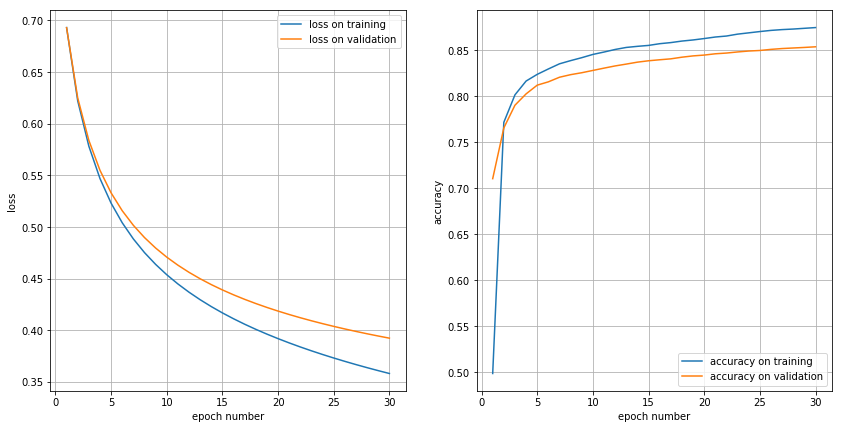

Time = 513.8844006061554


In [82]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-5,lr=1e-3,n_epoch=30000)
print('Time =',(time.time()-start_time)

_Question: plot the training curves? In how many epoch does yout algorithm converge? What accuracy do you get on train, dev and test sets? Do you observe underfitting or overfitting?_

In average n_epoch 30k enough for convergence when we have learning rate = [1e-2, 1e-3] and  alpha=[1e-3, 1e-5]

We can see overfitting and many test below 

For example for alpha=1e-5,lr=1e-1 wehave overfitting from 7 epoch -> less lr , faster convergence

10. Try to set different learning rates.

*Question: Plot different training curves for different learning rate parameters. Which conclusions could be made on this?*

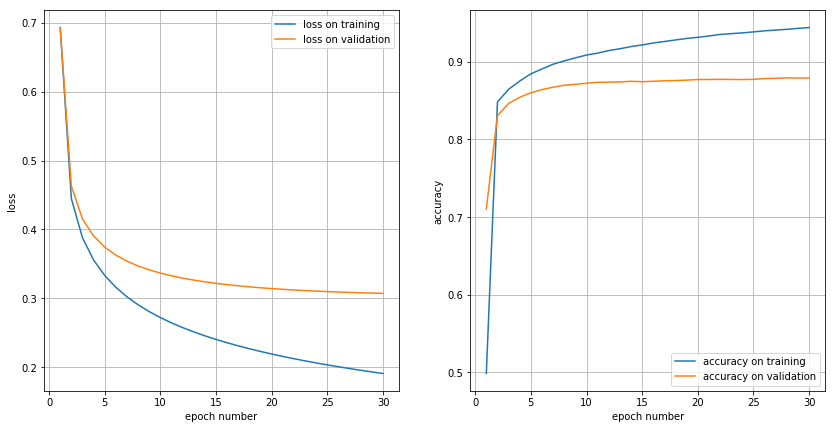

Time = 499.79192066192627


In [83]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000)
print('Time =',time.time()-start_time)

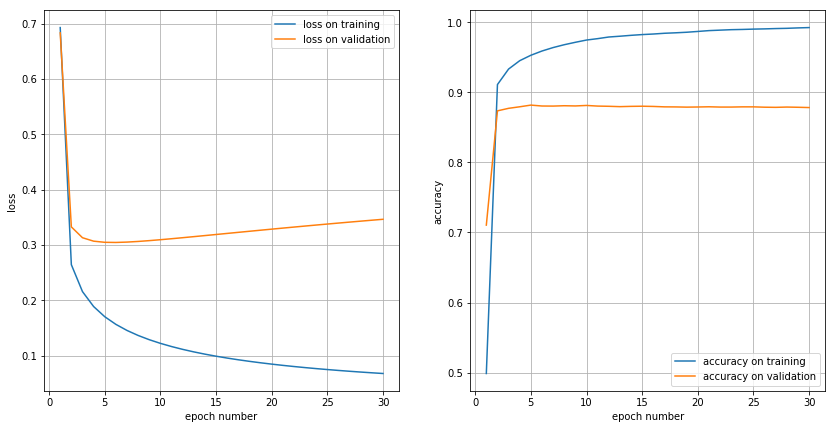

Time = 509.7895212173462


In [84]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-5,lr=1e-1,n_epoch=30000)
print('Time =',time.time()-start_time)

From plot of curves we can see overfitting or underfitting

11. For $\alpha$ coefficient of $L_2$ regularizer we used a random value. Wrong/inappropriate $\alpha$ causes underfitting ($\alpha$ is too large) or overfitting ($\alpha$ is too small). Choose the appropriate $\alpha$ that helps to perform better on validation set. Be careful: $\alpha$ changes the objective fiunction, so it is possible that the learning rate and the number of epochs should be changed too. Use plots to choose the appropriate values!

_Question: plot training curves for several $\alpha$ values. What conclusions could be made? How many epochs and which learning rate do you need until it converges? How long does it take to train and to label test data?_

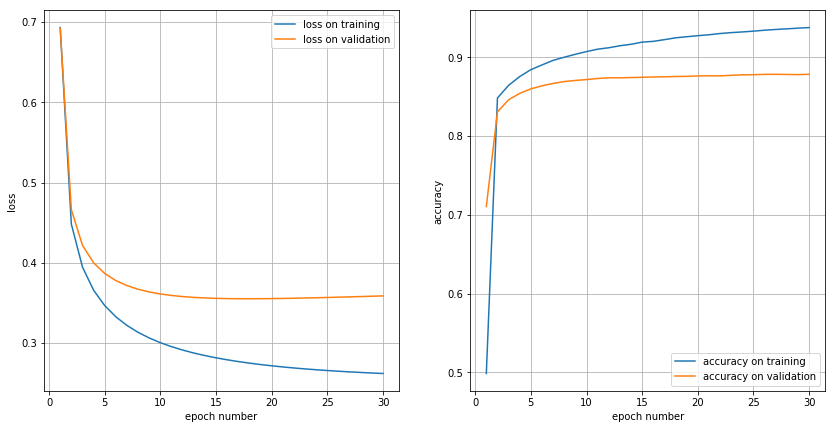

final train accuracy = 0.9374666666666667 dev accuracy = 0.8782
Time = 8.451867564519246


In [98]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000)
print('Time =',(time.time()-start_time)/60)

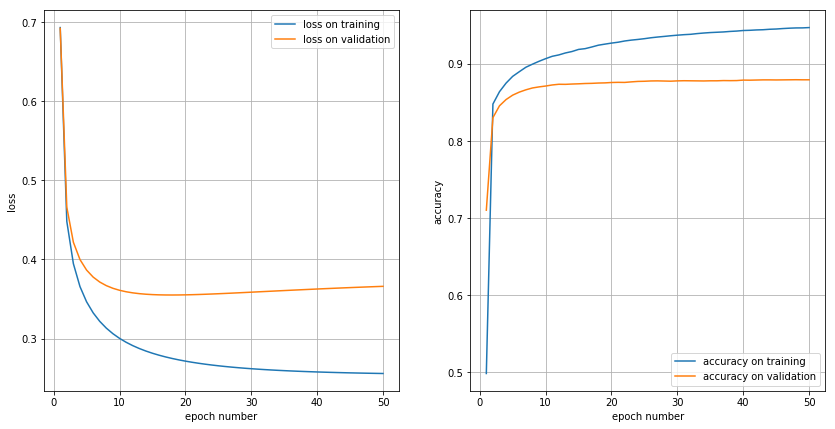

final train accuracy = 0.9473333333333334 dev accuracy = 0.8796
Time = 833.3754980564117


In [99]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-2,n_epoch=50000)
print('Time =',time.time()-start_time)

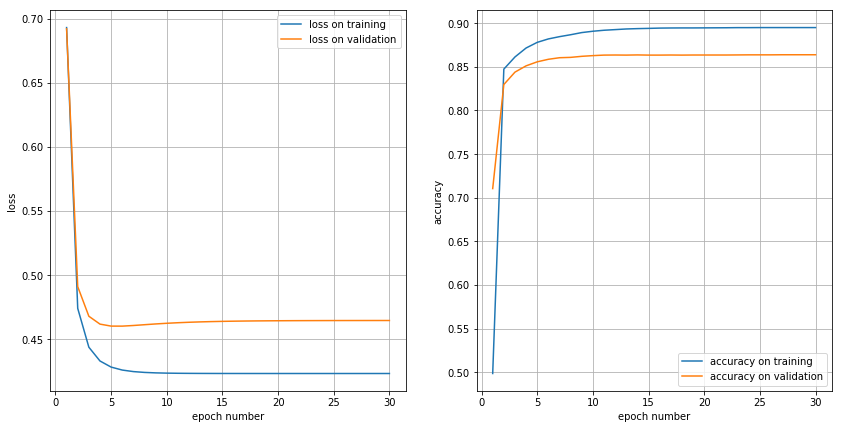

final train accuracy = 0.8949333333333334 dev accuracy = 0.8638
Time = 498.9316394329071


In [100]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-2,lr=1e-2,n_epoch=30000)
print('Time =',time.time()-start_time)

Here the best parameters  alpha=1e-3,lr=1e-2,n_epoch=30000

When we have low alpha we shoukd fit more epoches for the same reults when we have bigger alpha.

12. Adding $n$-grams may significantly help to improve model performance. Try to define the approprate values for $n$, to get better performance. Take into account, that the hyperparamemters you have found for unigram model (learning rate, epochs number, $\alpha$) may not be appropriate (optimal) for the $n$-gram model. 


*Question: how much do $n$-grams improve the performance? Which hyperparameters you changed?*

on 1 or 2 % for validation and achieve 100% on train. alpha and learning rate like the same for unigram but thanks to early stopping we need less epoches for convergence

In [119]:
train_texts_tok_bi = tokenization_gram(train_texts,gram_range = (1,2))
dev_texts_tok_bi = tokenization_gram(dev_texts,gram_range = (1,2))
dev_b_texts_tok_bi = tokenization_gram(dev_b_texts,gram_range = (1,2))
test_texts_tok_bi = tokenization_gram(test_texts,gram_range = (1,2))
test_b_texts_tok_bi = tokenization_gram(test_b_texts,gram_range = (1,2))

train_texts_tok_tri = tokenization_gram(train_texts,gram_range = (1,3))
dev_texts_tok_tri = tokenization_gram(dev_texts,gram_range = (1,3))
dev_b_texts_tok_tri = tokenization_gram(dev_b_texts,gram_range = (1,3))
test_texts_tok_tri = tokenization_gram(test_texts,gram_range = (1,3))
test_b_texts_tok_tri = tokenization_gram(test_b_texts,gram_range = (1,3))

In [106]:
vocab_1_2 = make_vocab_ngram(train_texts_tok,gram_range=(1,2))
vocab_1_3 = make_vocab_ngram(train_texts_tok,gram_range=(1,3))

In [128]:
all_ll = []
for  text in train_texts_tok_bi:
    all_ll.append(text)
for  text in dev_texts_tok_bi:
    all_ll.append(text)

In [132]:
vocab_all_1_2_2 = make_vocab_ngram(all_ll,gram_range=(1,2))

In [134]:
len(vocab_all_1_2_2)

4715468

In [135]:
X_train_1_2_all, vocabulary_1_2_all = to_mtx(all_ll, vocab_all_1_2_2,with_vocab=True)

In [138]:
X_train_1_2_all

<25000x1868818 sparse matrix of type '<class 'numpy.int64'>'
	with 6028000 stored elements in Compressed Sparse Row format>

In [107]:
print(len(train_texts_tok_bi),len(dev_texts_tok_bi))
all_texts_bi = train_texts_tok_bi+dev_texts_tok_bi
vocab_all_1_2 = make_vocab_ngram(all_texts_bi,gram_range=(1,2))


all_all_texts_bi = train_texts_tok_bi+dev_texts_tok_bi+dev_b_texts_tok_bi
vocab_all_all_1_2 = make_vocab_ngram(all_all_texts_bi,gram_range=(1,2))

15000 10000


In [108]:
len(vocab_all_1_2),len(vocab_1_2),len(vocab_all_all_1_2)

(4715468, 1241551, 4745844)

In [145]:
X_train_1_2_all, vocabulary_1_2_all = to_mtx(all_texts_bi, vocab_all_1_2,with_vocab=True)
X_dev_1_2_all = to_mtx_test(dev_texts_tok_bi, vocab_all_1_2, vocabulary_1_2_all)
X_dev_b_1_2_all =  to_mtx_test(dev_b_texts_tok_bi, vocab_all_1_2, vocabulary_1_2_all)
X_test_1_2_all = to_mtx_test(test_texts_tok_bi, vocab_all_1_2, vocabulary_1_2_all)
X_test_b_1_2_all =  to_mtx_test(test_b_texts_tok_bi, vocab_all_1_2, vocabulary_1_2_all)

In [146]:
X_train_1_2_all.shape

(25000, 1868818)

In [96]:
X_train_1_2_all_all, vocabulary_1_2_all_all = to_mtx(train_texts_tok_bi, vocab_all_all_1_2,with_vocab=True)
X_dev_1_2_all_all = to_mtx_test(dev_texts_tok_bi, vocab_all_all_1_2, vocabulary_1_2_all_all)
X_dev_b_1_2_all_all =  to_mtx_test(dev_b_texts_tok_bi, vocab_all_all_1_2, vocabulary_1_2_all_all)
X_test_1_2_all_all = to_mtx_test(test_texts_tok_bi, vocab_all_all_1_2, vocabulary_1_2_all_all)
X_test_b_1_2_all_all =  to_mtx_test(test_b_texts_tok_bi, vocab_all_all_1_2, vocabulary_1_2_all_all)

In [147]:
X_train_1_2, vocabulary_1_2 = to_mtx(all_texts_bi, vocab_1_2,with_vocab=True)
X_dev_1_2 = to_mtx_test(dev_texts_tok_bi, vocab_1_2, vocabulary_1_2)
X_dev_b_1_2 =  to_mtx_test(dev_b_texts_tok_bi, vocab_1_2, vocabulary_1_2)
X_test_1_2 = to_mtx_test(test_texts_tok_bi, vocab_1_2, vocabulary_1_2)
X_test_b_1_2 =  to_mtx_test(test_b_texts_tok_bi, vocab_1_2, vocabulary_1_2)


X_train_1_3, vocabulary_1_3 = to_mtx(train_texts_tok_tri, vocab_1_3,with_vocab=True)
X_dev_1_3 = to_mtx_test(dev_texts_tok_tri, vocab_1_3, vocabulary_1_3)
X_dev_b_1_3 =  to_mtx_test(dev_b_texts_tok_tri, vocab_1_3, vocabulary_1_3)
X_test_1_3 = to_mtx_test(test_texts_tok_tri, vocab_1_3, vocabulary_1_3)
X_test_b_1_3 =  to_mtx_test(test_b_texts_tok_tri, vocab_1_3, vocabulary_1_3)

In [149]:
X_train_1_2.shape, len(vocabulary_1_2),X_dev_1_2.shape

((25000, 1241551), 1241551, (10000, 1241551))

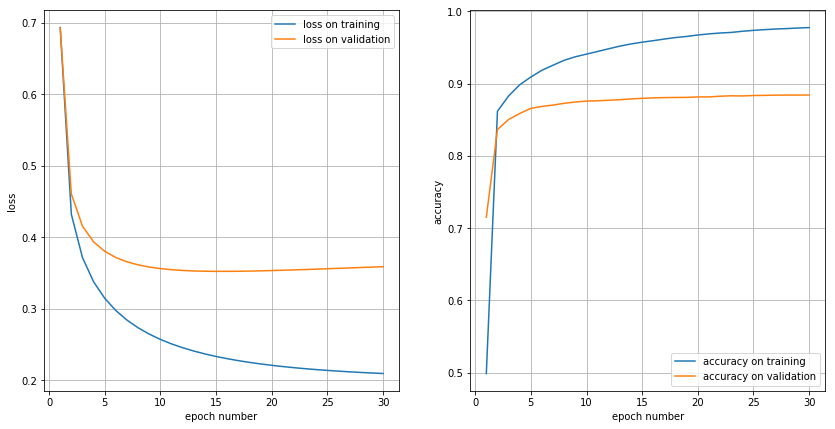

final train accuracy = 0.9776666666666667 dev accuracy = 0.8843
Time = 24.59899819691976


In [104]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000)
print('Time =',(time.time()-start_time)/60)

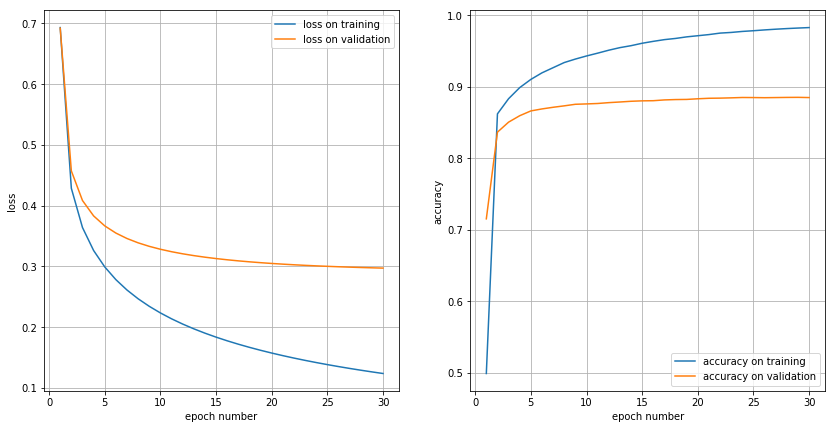

final train accuracy = 0.9827333333333333 dev accuracy = 0.8848
Time = 24.71592310667038


In [105]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000)
print('Time =',(time.time()-start_time)/60)

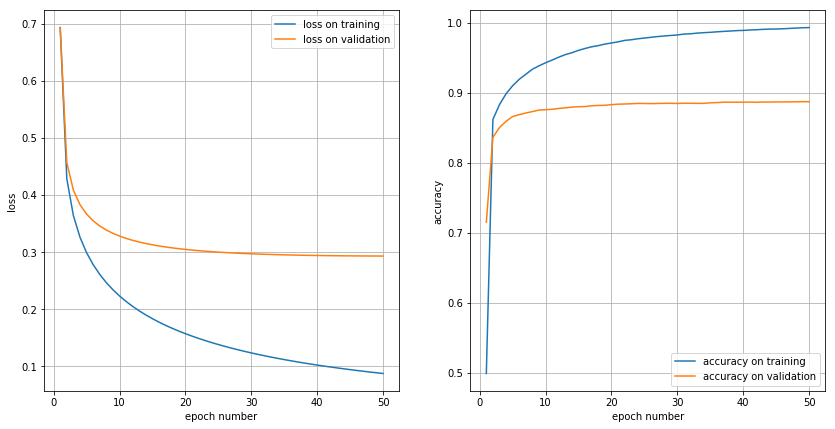

final train accuracy = 0.9933333333333333 dev accuracy = 0.8873
Time = 43.96190648078918


In [107]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=50000)
print('Time =',(time.time()-start_time)/60)

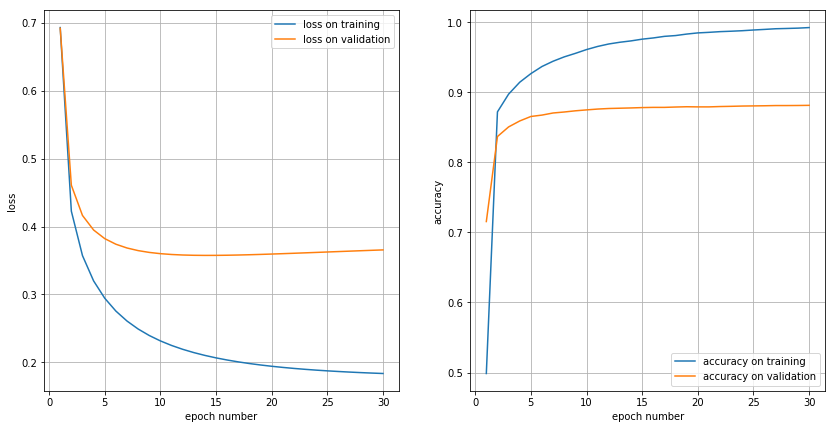

final train accuracy = 0.9922666666666666 dev accuracy = 0.8813
Time = 60.91745727062225


In [106]:
start_time = time.time()
W = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000)
print('Time =',(time.time()-start_time)/60)

13. Which features tend to be more significant (have max absolute values)? 

*Question: print 20 max features for positive and negative class*

In [162]:
max_features = 20
pos_feat = np.argsort(W)[-max_features:][::-1]
neg_feat = np.argsort(W)[:max_features]
dict_vocab = {val: key for key, val in vocabulary.items()}

20 max features for positive class

In [167]:
for num, pos in enumerate(pos_words):
    print(f'{num+1}. {dict_vocab[pos]}')

1. rounds
2. franchise
3. hatton
4. incorrectly
5. dong
6. testosterone
7. theatres
8. aforementioned
9. particular
10. chemicals
11. flood
12. scenarios
13. sleekly
14. equipment
15. straightforward
16. marketed
17. widowhood
18. szubanski
19. seldom
20. copping


20 max features for negative class

In [168]:
for num, neg in enumerate(neg_words):
    print(f'{num+1}. {dict_vocab[neg]}')

1. youth
2. ways
3. coordinated
4. imprisoned
5. community
6. terrible
7. dull
8. shortly
9. significant
10. zoe
11. realizes
12. researched
13. insufferably
14. said
15. north
16. jame
17. street
18. nebulous
19. gossiper
20. hewn


### 2.2 Feed-forward Neural Network

Implement neural network with $L$ layers ($L-1$ hidden layer) and train it at the _Large Movie Review_ dataset.

1. Repeat the steps 2.1.1 - 2.1.2 from the Logistic regression subsection.

In [42]:
import pandas as pd
import numpy as np 
import re
from tqdm import tqdm_notebook
import string
from scipy.sparse import csr_matrix, hstack, issparse, coo_matrix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [2]:
def read_data(path):
    data_path = '../FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [3]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [4]:

stopwords_eng = set(["them", "she", "wasn", "wasn't", "having", "ll", "hadn", "nor", "why", "these", "she's", "both", "you're", "an", "between", "myself", "because", "being", "ve", "while", "over", "whom", "isn", "shouldn", "wouldn't", "been", "d", "themselves", "does", "most", "below", "his", "you'll", "further", "there", "was", "ain", "doesn't", "each", "couldn", "which", "that'll", "down", "won't", "than", "y", "should've", "have", "until", "their", "through", "ma", "before", "is", "yours", "so", "up", "hasn", "doesn", "him", "very", "if", "mustn", "or", "it's", "too", "re", "mustn't", "as", "now", "isn't", "mightn't", "those", "other", "above", "who", "do", "the", "wouldn", "some", "this", "for", "don", "me", "any", "what", "theirs", "weren't", "mightn", "aren", "ours", "your", "didn't", "shan", "shouldn't", "off", "has", "just", "himself", "herself", "m", "we", "by", "aren't", "yourselves", "again", "after", "you've", "you", "how", "such", "can", "o", "were", "not", "they", "out", "few", "with", "i", "be", "haven't", "are", "s", "hadn't", "had", "our", "don't", "in", "needn't", "but", "during", "weren", "it", "will", "a", "did", "of", "shan't", "ourselves", "and", "no", "doing", "yourself", "at", "then", "you'd", "he", "once", "about", "where", "more", "only", "into", "same", "my", "hers", "t", "when", "its", "own", "here", "all", "won", "needn", "under", "br", "that", "couldn't", "from", "against", "itself", "am", "should", "her", "on", "to", "didn", "haven", "hasn't","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "br"])
def preprocess(text,stop_words=False,punctuation=False):
    """
    Preprocess the data
    
    stop_words: flag to remove stopwords
    punctuation: flag to remove punctuation
    """
    new_text = []
    for num,value in enumerate(text):
        value = value.lower()
        
        for char in set(string.punctuation):
            value = value.replace(char," "+char+" ")

        if stop_words:
            pp = " ".join([word for word in value.split() if word not in stopwords_eng])
            if punctuation:
                punctn = string.punctuation+'…–—‘“‚„«»'
                pp = pp.translate(str.maketrans('', '',punctn ))
                new_text.append(" ".join(pp.split()))
            else:
                new_text.append(pp)
        else:
            new_text.append(" ".join(value.split())) # remove multiple spaces
             
        
    return new_text

In [5]:
train_texts = preprocess(train_texts, stop_words=True,punctuation=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

In [6]:
def ngrams(words, gram_range):
    pp = []
    for igram in range(gram_range[0],gram_range[1]+1):
        for i in range(len(words)-igram+1):
            pp.append(" ".join(words[i:i+igram]))
            
    return pp

In [7]:
def tokenization_gram(text,gram_range = (1,1)):
    
    return [ngrams(line.split(),gram_range=gram_range) for line in text]

In [8]:
train_texts_tok = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok = tokenization_gram(test_b_texts,gram_range = (1,1))

In [9]:
def make_vocab_ngram(text, mode='ber',gram_range=(1,1), min_cnt=0):
    vocab = dict()
    
    if mode == 'ber':    
        for line in text:
            for word in set(ngrams(line,gram_range)):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
    else:
        for line in text:
            for word in ngrams(line,gram_range):     
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] +=1
                    
    if min_cnt:
        new_dict = dict()
        for key,val in vocab.items():
            if val > min_cnt:
                new_dict[key] = val
        vocab = new_dict
    return vocab

In [10]:
def to_mtx(text, vocab,with_vocab=False):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for line in text:
        for word in line:
            if word in vocab:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    if with_vocab:
        return csr_matrix((data, indices, indptr), dtype=int),vocabulary
    return csr_matrix((data, indices, indptr), dtype=int)

In [11]:
def to_mtx_test(text, vocab, voc_train, with_vocab=False):
    indptr = [0]
    indices = []
    data = []
    vocabulary = voc_train
    for line in text:
        for word in line:
            if word in vocab:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    if with_vocab:
        return csr_matrix((data, indices, indptr), dtype=int),vocabulary
    return csr_matrix((data, indices, indptr),shape=[len(text),len(vocab)], dtype=int)

In [12]:
vocab_1_1 = make_vocab_ngram(train_texts_tok,gram_range=(1,1))

X_train, vocabulary = to_mtx(train_texts_tok, vocab_1_1,with_vocab=True)
X_dev = to_mtx_test(dev_texts_tok, vocab_1_1, vocabulary)
X_dev_b = to_mtx_test(dev_b_texts_tok, vocab_1_1, vocabulary)

X_test = to_mtx_test(test_texts_tok, vocab_1_1, vocabulary)
X_test_b = to_mtx_test(test_b_texts_tok, vocab_1_1, vocabulary)

In [13]:
y_train = np.array([1 if label == 'pos' else 0 for label in train_labels ])
y_dev = np.array([1 if label == 'pos' else 0 for label in dev_labels ])
y_dev_b = np.array([1 if label == 'pos' else 0 for label in dev_b_labels ])

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[range(2)], sparse=False)
y_enc_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_enc_dev = encoder.fit_transform(y_dev.reshape(-1, 1))
y_enc_dev_b = encoder.fit_transform(y_dev_b.reshape(-1, 1))

2. Implement Feed-forward Neural Network with **one** hidden layer using **pytorсh**.

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

device = torch.device( 'cpu')
print(device)

from sklearn.metrics import accuracy_score

cpu


In [16]:
# Fully connected neural network with one hidden layer
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFNN, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size) 
        self.relu = nn.Tanh()
        self.output_layer = nn.Linear(hidden_size, num_classes)  
        
        self.init_weights()
        
    def init_weights(self):
        initrange = 0.5
        
        self.hidden_layer.weight.data.uniform_(-initrange, initrange)
        self.hidden_layer.bias.data.zero_()
        
        self.output_layer.weight.data.uniform_(-initrange, initrange)
        self.output_layer.bias.data.zero_()
        
    def forward(self, x):
        out = self.hidden_layer(x)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

In [17]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    if shuffle:
        indices = np.random.permutation(len(targets))
    #for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
    for batch_idx in range(int(len(targets)/batchsize)):        
        start_idx = batch_idx*batchsize
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [23]:
def evaluate_minibatch(model,X_test, y_test, criterion):
    test_loss_history = []
    test_acc = []
    y_pred_all = np.array([])
    
    model.eval()
    with torch.no_grad():
        for num_batch, (x_batch,y_batch) in enumerate(tqdm_notebook(iterate_minibatches(X_test, y_test, batchsize=batch_size, shuffle=False))):
            x_batch = torch.from_numpy(x_batch.todense()).float()
            y_batch = torch.from_numpy(y_batch).float()
            
            y_test_pred = model(x_batch)
            
            y_pred_all = np.append(y_pred_all,np.argmax(y_test_pred,axis=1).cpu().detach().numpy())
            
            test_loss = criterion(y_test_pred,y_batch)
            
            accuracy_batch = accuracy_score(np.argmax(y_batch, axis=1),np.argmax(y_test_pred,axis=1))
            test_acc.append(accuracy_batch)

            test_loss_history.append(test_loss)
#             print(test_acc[-1])
    return y_pred_all,test_loss_history,test_acc


In [24]:
def iterate_minibatch_predict(inputs, batchsize, shuffle=False):
    M, N = inputs.shape
    if shuffle:
        indices = np.random.permutation(M)
    #for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
    for batch_idx in range(int(M/batchsize)):        
        start_idx = batch_idx*batchsize
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt]

In [39]:
def predict_minibatch(model,X_test):
    y_pred_all = np.array([])
    model.eval()
    with torch.no_grad():
        for x_batch in tqdm_notebook(iterate_minibatch_predict(X_test,batchsize=batch_size, shuffle=False)):
            x_batch = torch.from_numpy(x_batch.todense()).float()
            
            y_test_pred = model(x_batch)
            
            y_pred_all = np.append(y_pred_all,np.argmax(y_test_pred,axis=1).cpu().detach().numpy())
    return y_pred_all


In [43]:
def train(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epoch = 5, batch_size = 100,with_plot=True):
    train_loss_history = []
    test_loss_history = []
    
    train_acc = []
    test_acc = []
    
    y_pred_all = np.array([])

    
    for epoch in tqdm_notebook(range(n_epoch)):
        model.train()

        train_loss_epoch = []
        train_acc_epoch = []
        
#         for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        for num_batch, (x_batch,y_batch) in enumerate(tqdm_notebook(iterate_minibatches(X_train, y_train, batchsize=batch_size, shuffle=True))):
#             print(x_batch.shape,y_batch.shape)
            
            x_batch = torch.from_numpy(x_batch.todense()).float()
            y_batch = torch.from_numpy(y_batch).float()
            optimizer.zero_grad()
        
            # Forward
            predictions = model(x_batch)
#             print(predictions)
            loss = criterion(predictions, y_batch)
    
            # Backward
            loss.backward()
            optimizer.step()
            acc =accuracy_score(np.argmax(y_batch.detach().numpy(), axis=1),np.argmax(predictions.detach().numpy(),axis=1))
            
            train_acc_epoch.append(acc)
            train_loss_epoch.append(loss.item())

        train_loss_history.append(np.mean(train_loss_epoch))
        train_acc.append(np.mean(train_acc_epoch))
        
        
        y_pred_all,test_loss_epoch,test_acc_epoch = evaluate_minibatch(model,X_test, y_test, criterion)
        test_loss_history.append(np.mean(test_loss_epoch))
        test_acc.append(np.mean(test_acc_epoch))

        if with_plot:
            clear_output(True)
            plt.figure(figsize=(14, 7))

            plt.subplot(121)
            plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
            plt.plot(np.arange(len(test_loss_history)) + 1, test_loss_history, label='loss on validation')
            plt.ylabel('loss')
            plt.xlabel('epoch number')
            plt.legend()
            plt.grid()

            plt.subplot(122)
            plt.plot(np.arange(len(train_acc)) + 1, train_acc, label='accuracy on training')
            plt.plot(np.arange(len(test_acc)) + 1, test_acc, label='accuracy on validation')
            plt.ylabel('accuracy')
            plt.xlabel('epoch number')
            plt.legend()
            plt.grid()
            plt.show()
    return y_pred_all

In [47]:
_,input_size = X_train.shape
num_classes = len(set(y_train))
hidden_size = 1024
learning_rate = 1e-3
batch_size = 100

In [50]:
model = FFNN(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

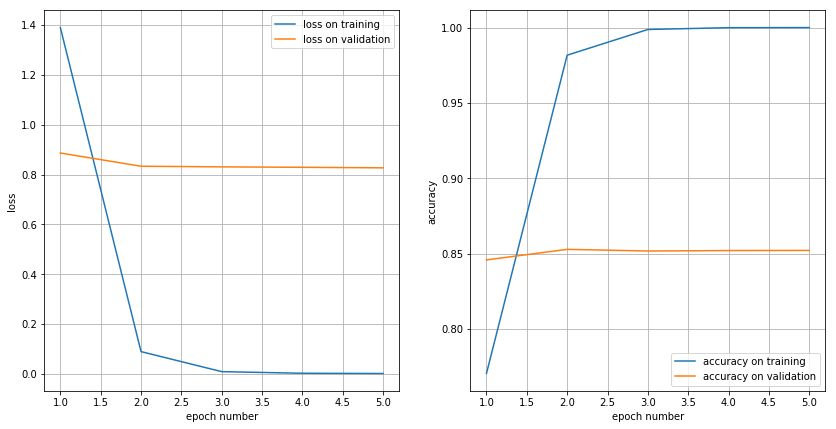

Time = 5.738292185465495


In [51]:
start_time = time.time()
y_pred_all = train(model,X_train, y_enc_train, X_dev, y_enc_dev,criterion,optimizer,n_epoch = 5)
print('Time =',(time.time()-start_time)/60)

In [54]:
_,input_size = X_train.shape
num_classes = len(set(y_train))
hidden_size = 1024
learning_rate = 1e-4
batch_size = 100

model = FFNN(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

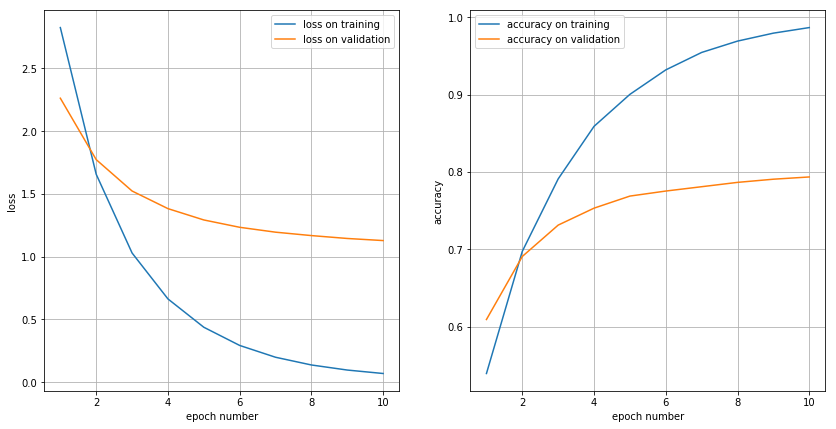

Time = 11.281112782160442


In [55]:
start_time = time.time()
y_pred_all = train(model,X_train, y_enc_train, X_dev, y_enc_dev,criterion,optimizer,n_epoch = 10)
print('Time =',(time.time()-start_time)/60)

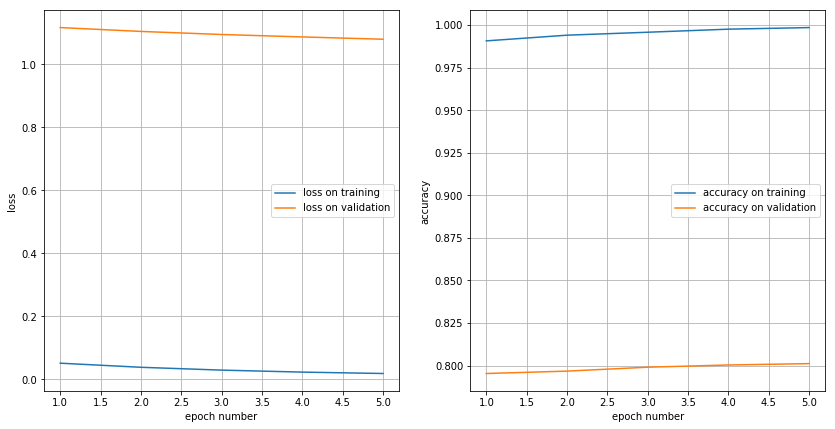

Time = 5.66177001396815


In [56]:
start_time = time.time()
y_pred_all = train(model,X_train, y_enc_train, X_dev, y_enc_dev,criterion,optimizer,n_epoch = 5)
print('Time =',(time.time()-start_time)/60)

In [40]:
y_dev_all = predict_minibatch(model,X_dev)

3. Similarly to 2.1.10 and 2.1.11, do the finetuning for the learning rate and $\alpha$ coefficient of $L_2$ regularizer hyperparameters on validation set.


_Question: What is the optimal value of $\alpha$? of learning rate? How many epoch does it take to converge?_


Here you can see that convergence and accuracy of algorithm strongly influence from learning_rate. 

you can see upper appropriate number of epoches from pictures.

Using $\alpha$ and learning rate from 2.2.3 train the classifier on the whole train set. 


_Question: Evaluate the classifier performance on train and test sets? How much time does it take to train the classifier and to label test data?_

like 10 minutes

## 3. Research part

### 3.1 Logistic regression

Apart form classical gradient descent approach there are a lot of SGD variations, such as Adam, Adagrad, RMSProp, that are frequently used in the real-word cases. ([short](http://cs231n.github.io/neural-networks-3/#update) and [long](http://ruder.io/optimizing-gradient-descent/index.html#momentum) reviews on these approaches). The key thing about those approaches: apart from the gradients they use second derivative (momentum) for the next step.

1. Implement Momentum or Adagrad and use it to train your logreg. Draw several plots for training with different hyperparameter values. What can be observed from the results and what conclusions could be made?

In [44]:
def ADAM(W, gradient, lr, m,v,beta1 = 0.9, beta2 = 0.999,eps = 1e-10,t = 0):
    t+=1
    m = beta1*m + (1-beta1)*gradient
    mt = m / (1-beta1**t)
    v = beta2*v + (1-beta2)*(gradient**2)
    vt = v / (1-beta2**t)
    W -=  lr * mt / (np.sqrt(vt) + eps)
    return W, v, m, t

In [45]:
def Nesterov_Momentum(W, gradient, lr, v, mu=0.9):
    v_prev = v # back this up
    v = mu * v - lr * gradient # velocity update stays the same
    W += -mu * v_prev + (1 + mu) * v # position update changes form
    return W, v

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
def train(X_train, y_train, X_dev, y_dev, alpha, lr=0.01,n_epoch=15, batch_size=1000, early_stop= 8, optim='adam',  with_plot=True, lr_downgrade=1):
    
    if optim.lower() == 'sgd':
        W = initialize_weights(X_train)
    elif optim.lower() == 'adam':
        W = initialize_weights(X_train)
        V = initialize_weights(X_train)
        M = initialize_weights(X_train)
        t = 0
    elif optim.lower() == 'nm':
        W = initialize_weights(X_train)
        V = initialize_weights(X_train)
        
    losses_tr = []
    accs_tr = []
    losses_dev = []
    accs_dev = []
    
    best_val_acc = []
    best__val_loss = 1
    diff_val_loss = 0
    
    for epoch in tqdm_notebook(range(n_epoch)):
        #train 
        z = X_train@W
        
        h = sigmoid(z)
        
        loss = -np.mean(y_train*np.log(h+1e-10)+(1-y_train)*np.log(1-h+1e-10))+np.sum(alpha*W*W)
        grads = gradient(W, X_train, y_train,alpha)
        if optim.lower() == 'sgd':
            W = SGD(W,grads,lr) 
        elif optim.lower() == 'adam':
            W, V, M, t = ADAM(W, grads, lr, M, V,t=t) 
        elif optim.lower() == 'nm':
            W, V = Nesterov_Momentum(W,grads,lr, V) 
        
        
        #test
        zd = X_dev@W
        hd = sigmoid(zd)
        loss_d = -np.mean(y_dev*np.log(hd+1e-10)+(1-y_dev)*np.log(1-hd+1e-10))+np.sum(alpha*W*W)
        
        if loss_d < best__val_loss:
            best__val_loss = loss_d
            
            diff_val_loss = 0
        else:
            diff_val_loss +=1
            
        if (diff_val_loss >= (early_stop//5))& lr_downgrade:
            lr /=10
            lr_downgrade-=1
            print('lr was' ,lr*10,'lr now',lr)
        
        if diff_val_loss == early_stop:
            print(f'Early stopping on epoch = {epoch} with best accuracy on dev = {np.max(accs_dev)}')
            break
            
        if(epoch % 100 == 0):
            losses_tr.append(loss)
            accs_tr.append(accuracy(np.round(h),y_train))
            losses_dev.append(loss_d)
            accs_dev.append(accuracy(np.round(hd),y_dev))
            
            if with_plot:
                clear_output(True)
                plt.figure(figsize=(14, 7))

                plt.subplot(121)
                plt.plot(np.arange(len(losses_tr)) + 1, losses_tr, label='loss on training')
                plt.plot(np.arange(len(losses_dev)) + 1, losses_dev, label='loss on validation')
                plt.ylabel('loss')
                plt.xlabel('epoch number')
                plt.legend()
                plt.grid()

                plt.subplot(122)
                plt.plot(np.arange(len(accs_tr)) + 1, accs_tr, label='accuracy on training')
                plt.plot(np.arange(len(accs_dev)) + 1, accs_dev, label='accuracy on validation')
                plt.ylabel('accuracy')
                plt.xlabel('epoch number')
                plt.legend()
                plt.grid()
                plt.show()
    
    print(f'final train accuracy = {accs_tr[-1]} dev accuracy = {accs_dev[-1]}')
        
    return W

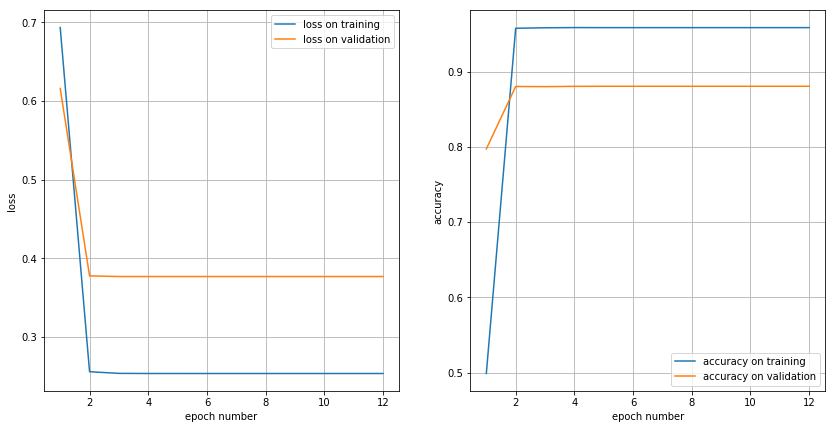

Early stopping on epoch = 1197 with best accuracy on dev = 0.8804
final train accuracy = 0.9583333333333334 dev accuracy = 0.8804
Time = 0.3912503798802694


In [76]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 1000)
print('Time =',(time.time()-start_time)/60)

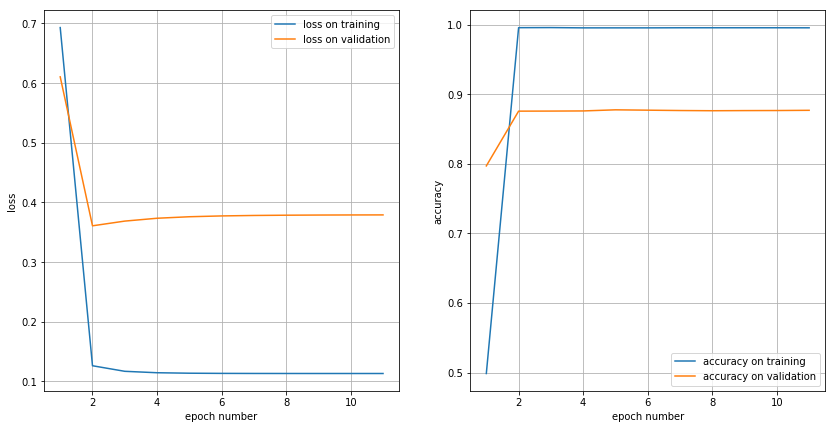

Early stopping on epoch = 1078 with best accuracy on dev = 0.8777
final train accuracy = 0.9956 dev accuracy = 0.877
Time = 0.3615352392196655


In [128]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-4,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 1000)
print('Time =',(time.time()-start_time)/60)

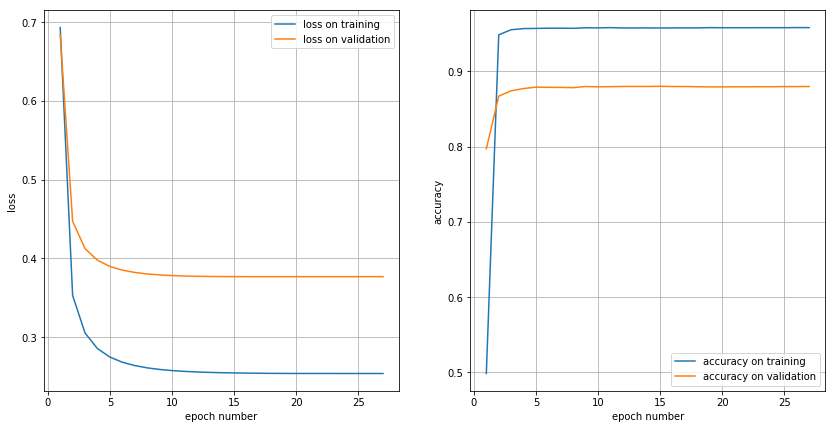

Early stopping on epoch = 2660 with best accuracy on dev = 0.8802
final train accuracy = 0.9581333333333333 dev accuracy = 0.8799
Time = 0.8936225732167562


In [82]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-3,n_epoch=30000,optim='adam', early_stop= 1000)
print('Time =',(time.time()-start_time)/60)

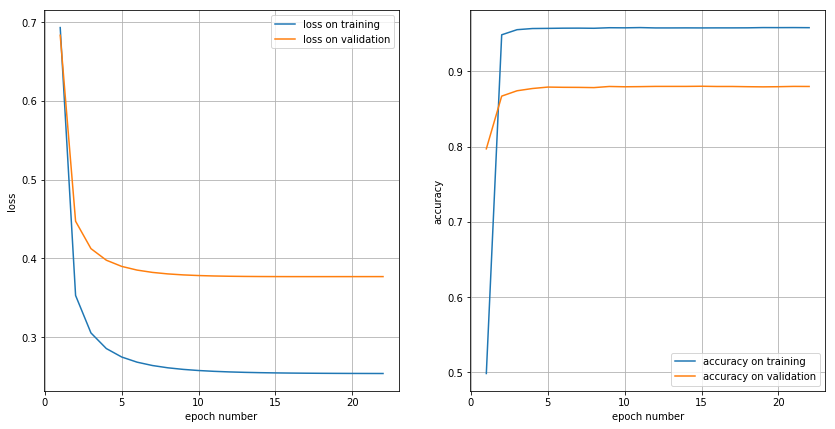

Early stopping on epoch = 2160 with best accuracy on dev = 0.8802
final train accuracy = 0.958 dev accuracy = 0.8799
Time = 0.7335846940676372


In [131]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-3,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

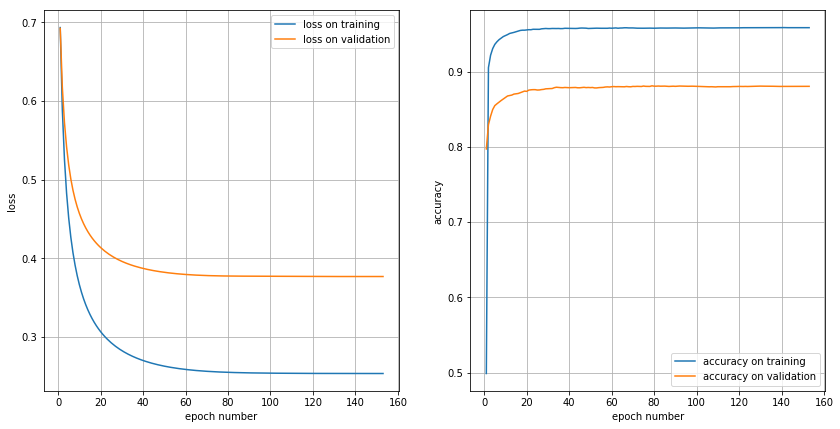

Early stopping on epoch = 15294 with best accuracy on dev = 0.881
final train accuracy = 0.9582666666666667 dev accuracy = 0.8803
Time = 5.148742322127024


In [134]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-4,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

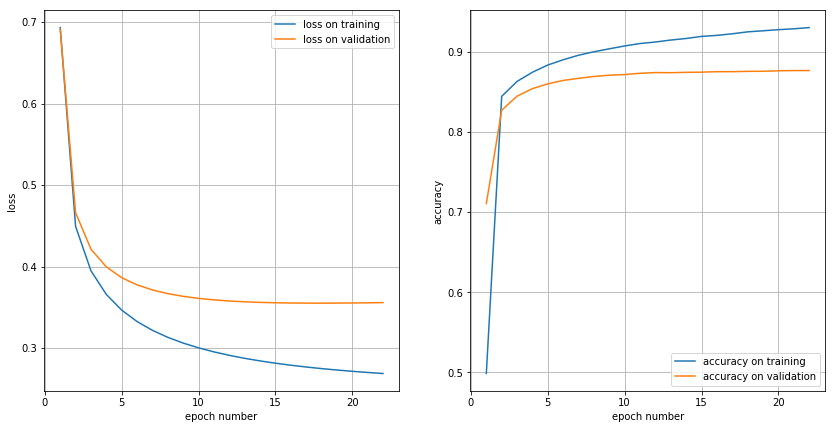

Early stopping on epoch = 2178 with best accuracy on dev = 0.8763
final train accuracy = 0.9298666666666666 dev accuracy = 0.8763
Time = 0.700605861345927


In [137]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000,optim='nm', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

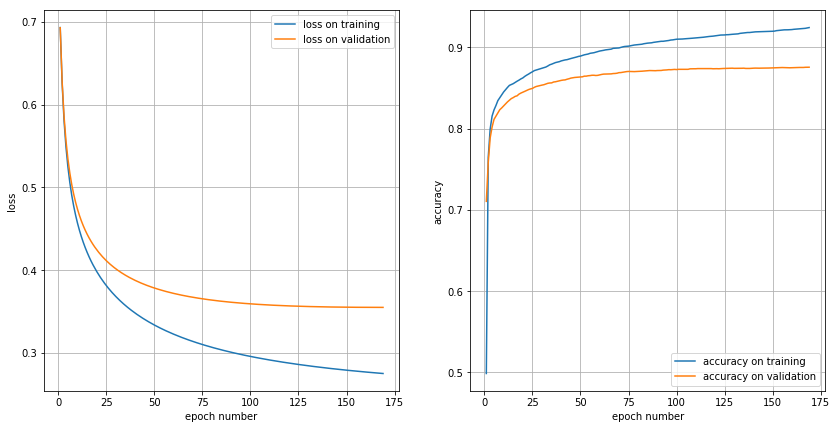

Early stopping on epoch = 16869 with best accuracy on dev = 0.8755
final train accuracy = 0.9242666666666667 dev accuracy = 0.8755
Time = 5.538396668434143


In [136]:
start_time = time.time()
W = train(X_train, y_train,X_dev, y_dev, alpha=1e-3,lr=1e-3,n_epoch=30000,optim='nm', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

### ON ngrams

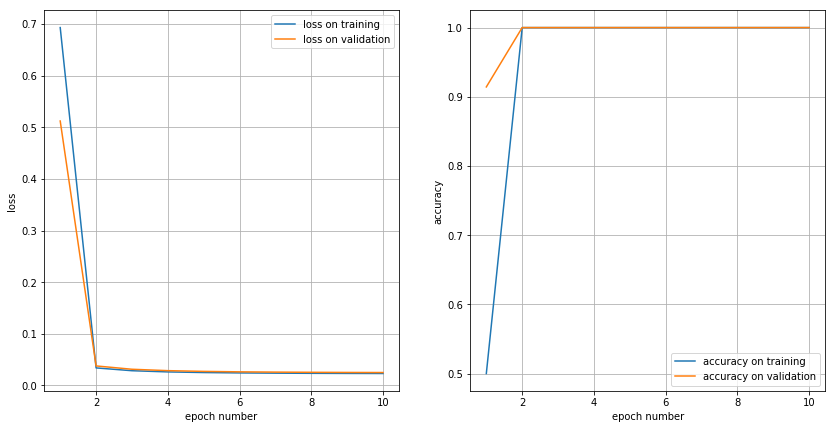

final train accuracy = 1.0 dev accuracy = 1.0
Time = 1.4129274487495422


In [160]:
start_time = time.time()
all_train = np.array(list(y_train)+list(y_dev))
W_1_2 = train(X_train_1_2, all_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=1000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

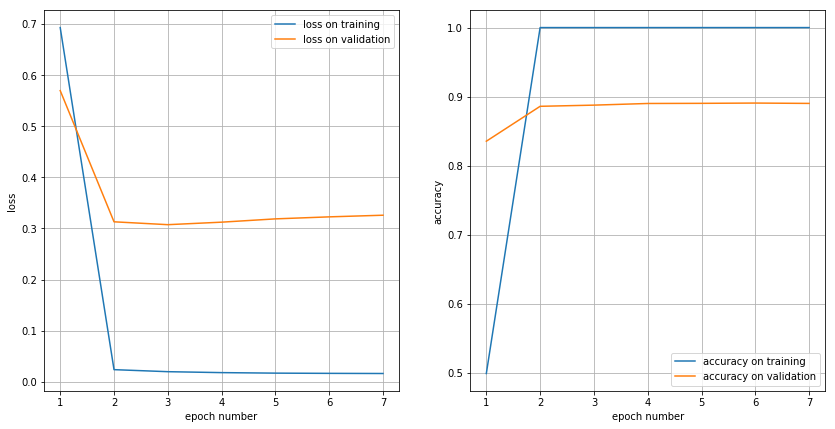

Early stopping on epoch = 674 with best accuracy on dev = 0.8906
final train accuracy = 1.0 dev accuracy = 0.8901
Time = 0.7414027174313863


In [74]:
start_time = time.time()
W_1_2 = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

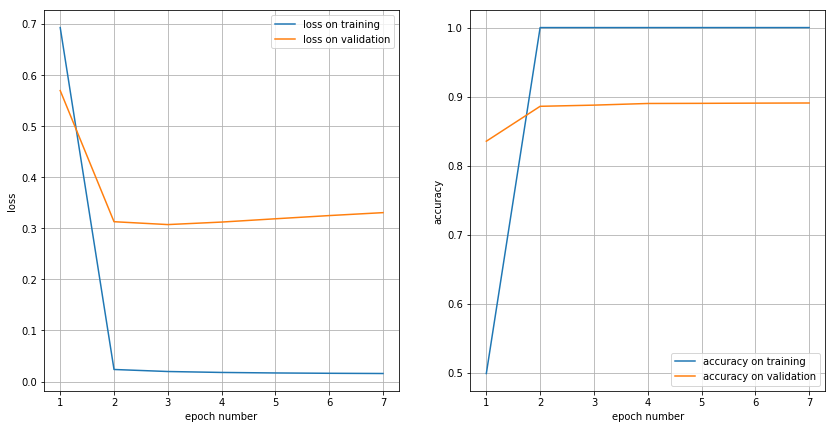

Early stopping on epoch = 674 with best accuracy on dev = 0.8907
final train accuracy = 1.0 dev accuracy = 0.8907
Time = 0.7556482831637065


In [138]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

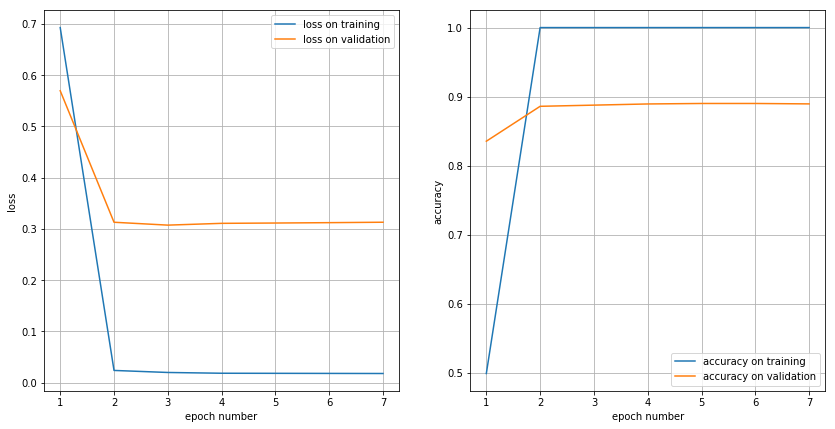

Early stopping on epoch = 674 with best accuracy on dev = 0.89
final train accuracy = 1.0 dev accuracy = 0.8894
Time = 0.7451427578926086


In [83]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

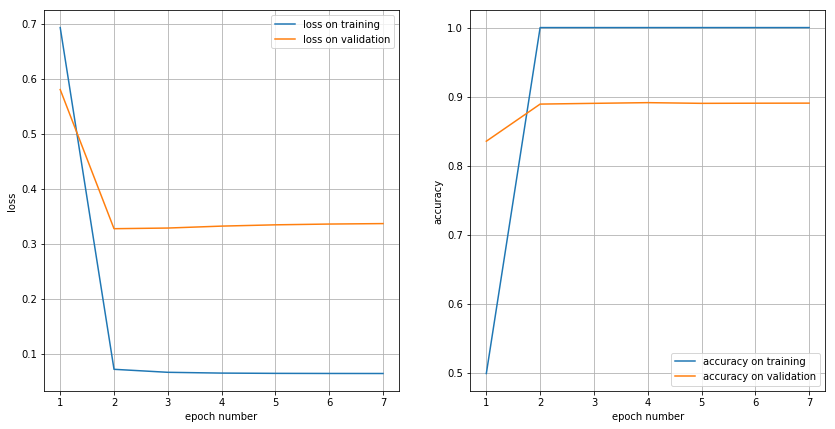

Early stopping on epoch = 628 with best accuracy on dev = 0.8912
final train accuracy = 1.0 dev accuracy = 0.8905
Time = 0.7212507247924804


In [145]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-4,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

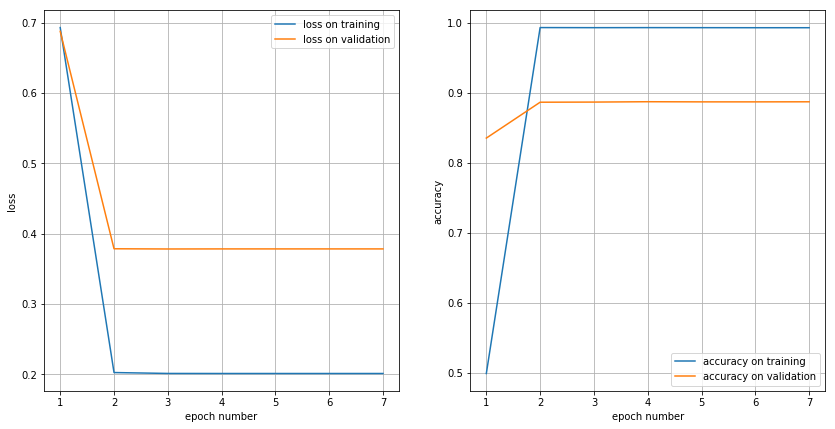

Early stopping on epoch = 648 with best accuracy on dev = 0.8873
final train accuracy = 0.9931333333333333 dev accuracy = 0.8872
Time = 0.7324646472930908


In [139]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

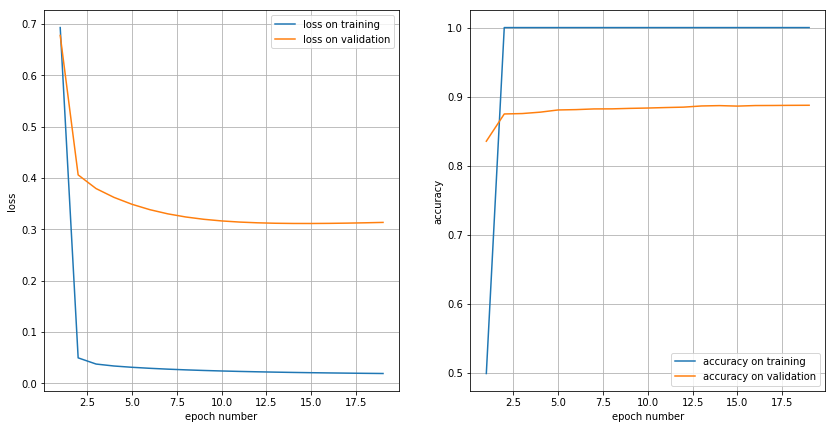

Early stopping on epoch = 1863 with best accuracy on dev = 0.8874
final train accuracy = 1.0 dev accuracy = 0.8874
Time = 2.1090362588564555


In [140]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-5,lr=1e-3,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

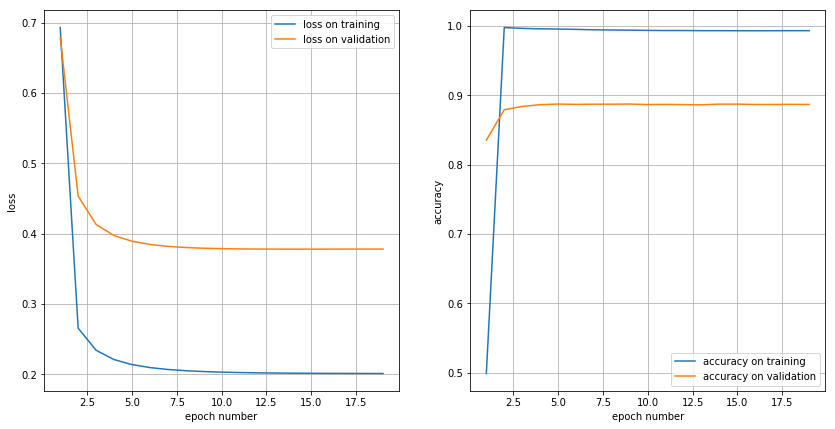

Early stopping on epoch = 1841 with best accuracy on dev = 0.8874
final train accuracy = 0.9932666666666666 dev accuracy = 0.8868
Time = 2.0243979930877685


In [141]:
start_time = time.time()
W = train(X_train_1_2, y_train,X_dev_1_2, y_dev, alpha=1e-3,lr=1e-3,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

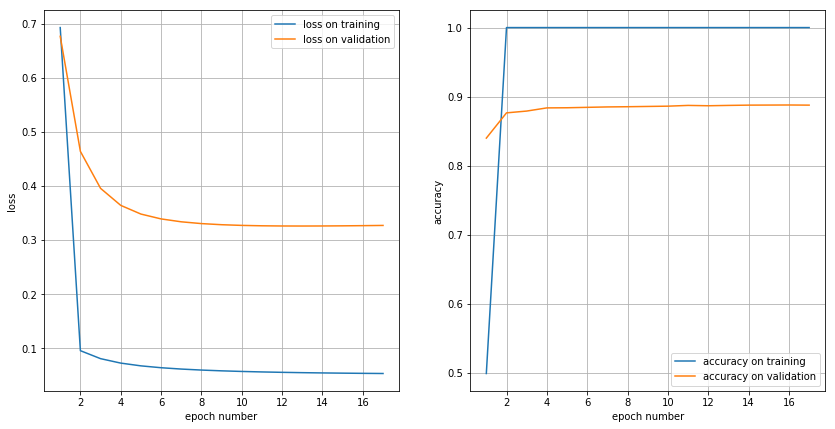

Early stopping on epoch = 1689 with best accuracy on dev = 0.8878
final train accuracy = 1.0 dev accuracy = 0.8876
Time = 4.524301119645437


In [72]:
start_time = time.time()
W_1_3 = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-4,lr=1e-3,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

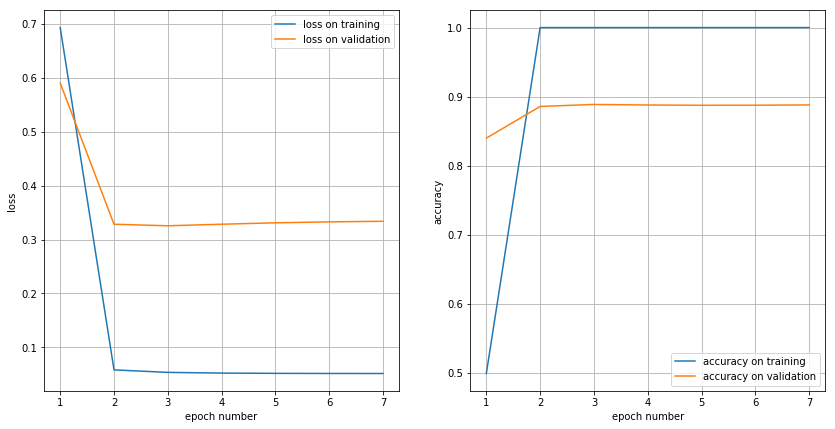

Early stopping on epoch = 664 with best accuracy on dev = 0.8886
final train accuracy = 1.0 dev accuracy = 0.8879
Time = 1.7807756463686626


In [71]:
start_time = time.time()
W_1_3 = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-4,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

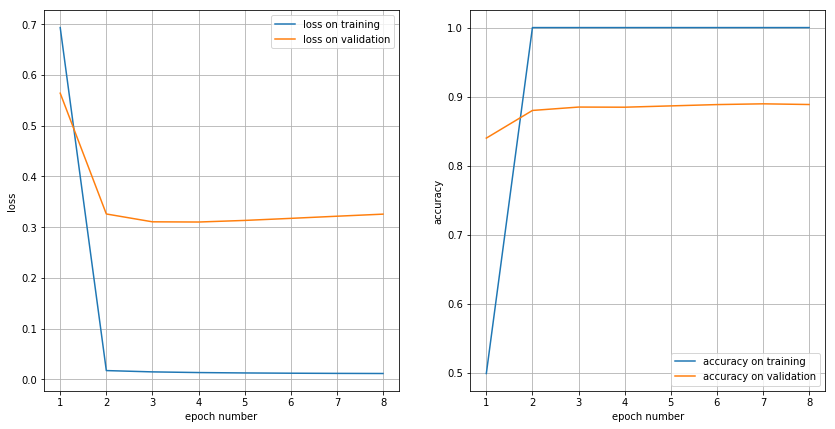

Early stopping on epoch = 751 with best accuracy on dev = 0.8895
final train accuracy = 1.0 dev accuracy = 0.8885
Time = 2.011822779973348


In [70]:
start_time = time.time()
W_1_3 = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-5,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

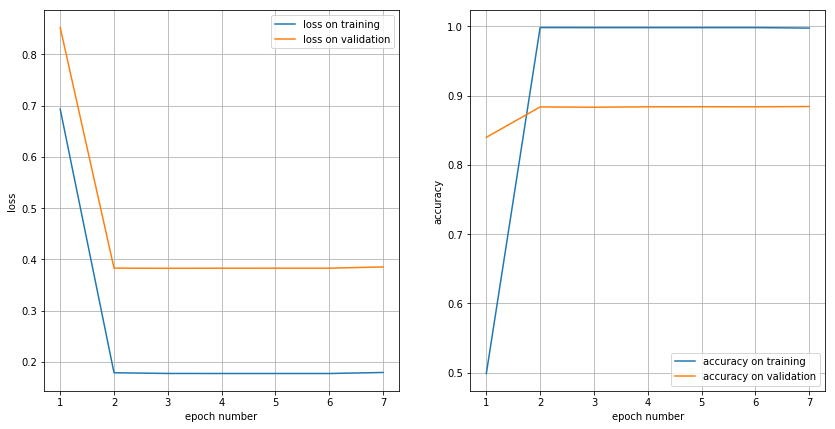

Early stopping on epoch = 646 with best accuracy on dev = 0.8843
final train accuracy = 0.9976 dev accuracy = 0.8843
Time = 1.6565438946088156


In [143]:
start_time = time.time()
W = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000,optim='adam', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

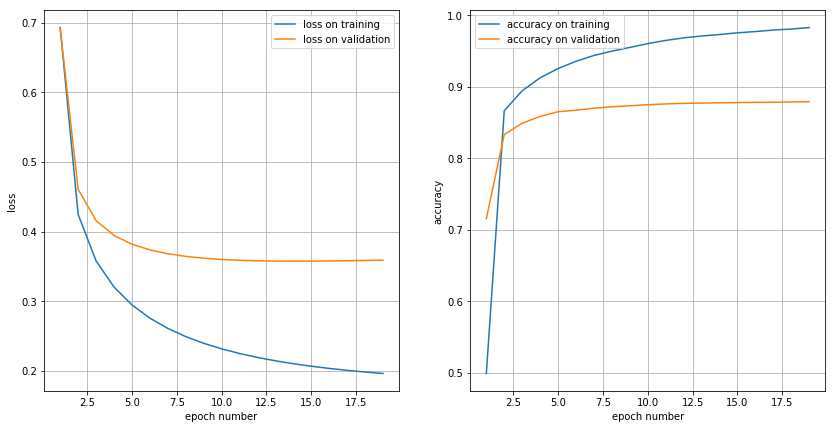

Early stopping on epoch = 1815 with best accuracy on dev = 0.8793
final train accuracy = 0.983 dev accuracy = 0.8793
Time = 3.917489926020304


In [69]:
start_time = time.time()
W_1_3 = train(X_train_1_3, y_train,X_dev_1_3, y_dev, alpha=1e-3,lr=1e-2,n_epoch=30000,optim='nm', early_stop= 500)
print('Time =',(time.time()-start_time)/60)

In [60]:
def predict(W,X_test):
    probs = []
    
    z = X_test@W
    preds = sigmoid(z)
    
    preds = np.round(preds)
        
    for pred in preds:
        if pred:
            probs.append('pos')
        else:
            probs.append('neg')
    return probs

In [161]:
dev_probs = predict(W_1_2,X_dev_1_2)
train_probs = predict(W_1_2,X_train_1_2)
test_probs = predict(W_1_2,X_test_1_2)
dev_b_probs = predict(W_1_2,X_dev_b_1_2)
test_b_probs = predict(W_1_2,X_test_b_1_2)

In [162]:
ind_train = [ 'train/'+str(i) for i in range(0,len(train_probs))]
ind_dev = [ 'dev/'+str(i) for i in range(0,len(dev_probs))]
ind_test = [ 'test/'+str(i) for i in range(0,len(test_probs))]
ind_devb = [ 'dev-b/'+str(i) for i in range(0,len(dev_b_probs))]
ind_testb = [ 'test-b/'+str(i) for i in range(0,len(test_b_probs))]
inds = ind_train+ind_dev +ind_test +ind_devb +ind_testb

In [163]:
final = pd.Series(train_probs+dev_probs+test_probs+dev_b_probs+test_b_probs)

In [164]:
final.index = inds

In [166]:
final.to_csv('preds_lr.tsv',sep='\t',header=False)